In [1]:
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
# Usamos o OneVsRestClassifier para previsão de multi-rótulos
from sklearn.multiclass import OneVsRestClassifier

# Targets e Scores

In [2]:
y_true = np.array([0, 1, 1, 0])
y_scores = np.array([0.24, 0.5, 0.53, 0.7])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

In [3]:
print(precision)  
print(recall)
print(thresholds)

[0.5        0.66666667 0.5        0.         1.        ]
[1.  1.  0.5 0.  0. ]
[0.24 0.5  0.53 0.7 ]


# A curva

## Configurações para classificação binária

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
# Adicionar ruído
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [6]:
# Deixando somente as duas primeiras classes
# dividindo em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

In [7]:
# Usando classificador simples
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

/home/glyph-vasts/D/Utilidades/Virtual_Envs/Python/data_science_studies/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [8]:
average_precision = average_precision_score(y_test, y_score)

print(f'Pontuação média de precisão-recall (AP): {average_precision:0.2f}')

Pontuação média de precisão-recall (AP): 0.88


In [9]:
precision, recall, _ = precision_recall_curve(y_test, y_score)

Text(0.5, 1.0, 'Curva Precisão-Recall de 2 classes: AP=0.88')

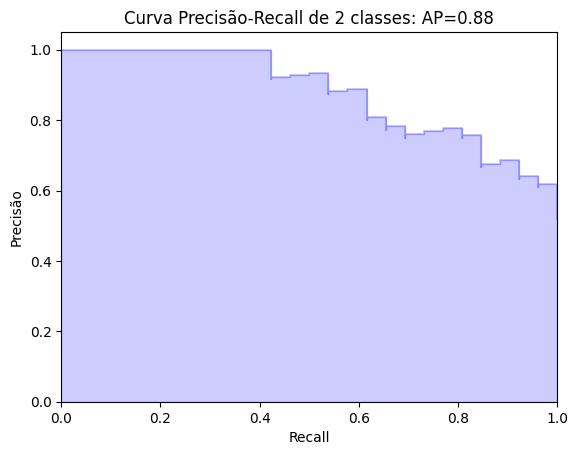

In [10]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Curva Precisão-Recall de 2 classes: AP={average_precision:0.2f}')

## Configurações para classificação de múltiplas classes

In [11]:
# Use label_binarize para multi-rótulos
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

In [12]:
# Dividido em treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=random_state)

In [13]:
# Treinar classificador
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

/home/glyph-vasts/D/Utilidades/Virtual_Envs/Python/data_science_studies/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/glyph-vasts/D/Utilidades/Virtual_Envs/Python/data_science_studies/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/glyph-vasts/D/Utilidades/Virtual_Envs/Python/data_science_studies/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [14]:
# Para cada classe
precision = dict()
recall = dict()
average_precision = dict()

In [15]:
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

In [16]:
# Uma "micro-média": quantificar a pontuação em todas as classes conjuntamente
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
score_print = average_precision["micro"]
print(f'Pontuação média de precisão, micro-média de todas as classes: {score_print:0.2f}')

Pontuação média de precisão, micro-média de todas as classes: 0.43


Text(0.5, 1.0, 'Pontuação média de precisão, micro-média para todas as classes: AP=0.43')

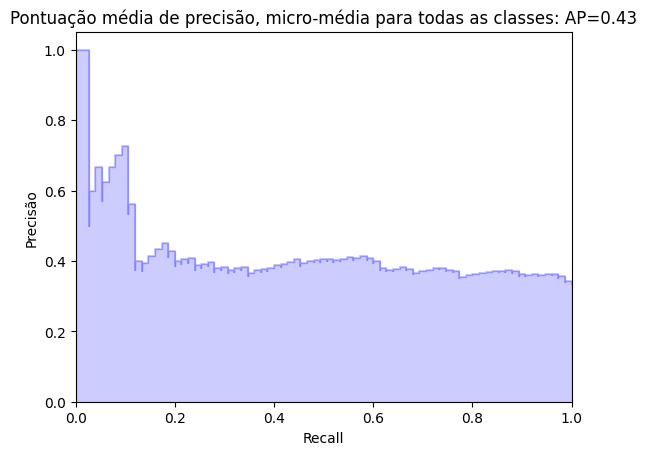

In [17]:
plt.figure()
plt.step(recall['micro'], precision['micro'],
         color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"],
                 step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
titulo = 'Pontuação média de precisão, micro-média para todas as classes: AP='
titulo += f'{average_precision["micro"]:0.2f}'
plt.title(titulo)

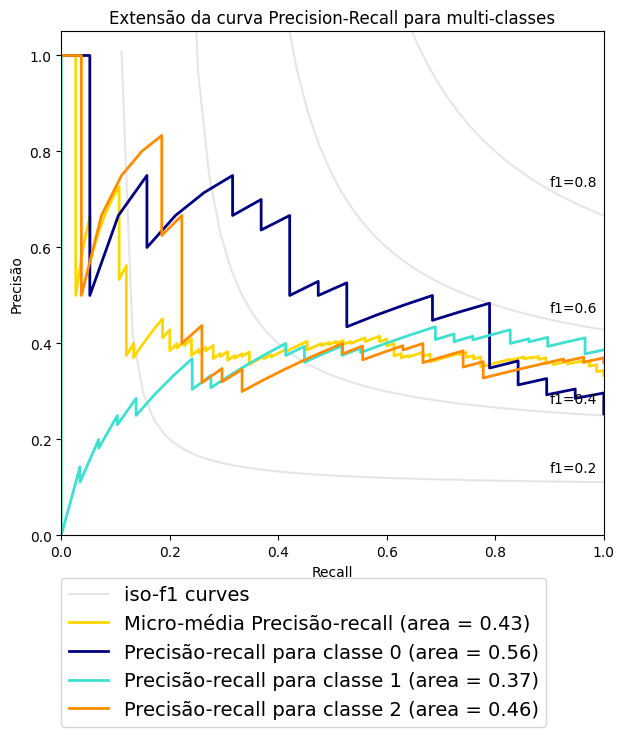

In [18]:
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2,
                       0.8,
                       num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('Micro-média Precisão-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append(f'Precisão-recall para classe {i} (area = {average_precision[i]:0.2f})')

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Extensão da curva Precision-Recall para multi-classes')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()